# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三次        
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Affairs.csv')
# 2. 型別確認與基本資訊
print("--- 資料型別檢查 ---")
df.head()

--- 資料型別檢查 ---


,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [3]:
df.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [4]:
# ↑由上可知，此資料集沒有缺失值
# 缺失值處理
# 數值型用平均值補缺失
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 類別型用眾數補缺失
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [5]:
# 轉換目標：
# 只要次數 > 0，就當作 1 (有)；
# 次數 = 0，就當作 0 (沒有)
df['ynaffairs'] = df['affairs'].apply(lambda x: 1 if x > 0 else 0)

# 看看資料前五筆
print(df.head())

   affairs  gender   age  yearsmarried children  religiousness  education  \
0        0    male  37.0         10.00       no              3         18   
1        0  female  27.0          4.00       no              4         14   
2        0  female  32.0         15.00      yes              1         12   
3        0    male  57.0         15.00      yes              5         18   
4        0    male  22.0          0.75       no              2         17   

   occupation  rating  ynaffairs  
0           7       4          0  
1           6       4          0  
2           1       4          0  
3           6       5          0  
4           6       3          0  


In [6]:
# 把文字轉成數字 0 和 1
# drop_first=True 是為了避免「虛擬變數陷阱」，只留一欄就能代表兩種狀態
df_final = pd.get_dummies(df, columns=['gender', 'children'], drop_first=True, dtype=int)

# 移除原本的 affairs 次數欄位，留下我們要預測的 affairs_binary
# 定義 X (特徵) 與 y (目標)
X = df_final.drop(['affairs', 'ynaffairs'], axis=1) # 題目
y = df_final['ynaffairs'] # 答案
print(df_final.head())

   affairs   age  yearsmarried  religiousness  education  occupation  rating  \
0        0  37.0         10.00              3         18           7       4   
1        0  27.0          4.00              4         14           6       4   
2        0  32.0         15.00              1         12           1       4   
3        0  57.0         15.00              5         18           6       5   
4        0  22.0          0.75              2         17           6       3   

   ynaffairs  gender_male  children_yes  
0          0            1             0  
1          0            0             0  
2          0            0             1  
3          0            1             1  
4          0            1             0  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定義變數與數據縮放
# 數據標準化

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切分 80% 訓練集與 20% 測試集
# random_state=42 就是我們之前說的「隨機種子」，確保每次結果一樣
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

# 建立模型並開始學習
# 建立邏輯回歸模型
model = LogisticRegression(max_iter=1000) # max_iter 是讓電腦多嘗試幾次直到收斂
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
#測試
# 績效評估與風險鑑定
# 對於分類問題，我們除了看準確度（Accuracy），更要看混淆矩陣 (Confusion Matrix)

from sklearn.metrics import classification_report, accuracy_score

# 讓電腦預測測試集的結果
predictions = model.predict(X_test)

# 印出準確度
print(f"準確度 (Accuracy): {accuracy_score(y_test, predictions):.2%}")
print(classification_report(y_test, predictions))

準確度 (Accuracy): 75.21%
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        91
           1       0.50      0.23      0.32        30

    accuracy                           0.75       121
   macro avg       0.64      0.58      0.58       121
weighted avg       0.71      0.75      0.72       121



In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 績效評估與風險鑑定
# 對於分類問題，我們除了看準確度（Accuracy），更要看混淆矩陣 (Confusion Matrix)

# 1. 進行預測
predictions = model.predict(X_test)

# 2. 評估表現
print(f"準確度 (Accuracy): {accuracy_score(y_test, predictions):.4f}")
print("\n詳細分類報告：")
print(classification_report(y_test, predictions))

# 3. 找出影響外遇的核心風險因子
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n--- 影響因子分析 (係數愈大，代表發生機率愈高) ---")
print(importance)

準確度 (Accuracy): 0.7521

詳細分類報告：
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        91
           1       0.50      0.23      0.32        30

    accuracy                           0.75       121
   macro avg       0.64      0.58      0.58       121
weighted avg       0.71      0.75      0.72       121


--- 影響因子分析 (係數愈大，代表發生機率愈高) ---
         Feature  Coefficient
1   yearsmarried     0.382245
4     occupation     0.153203
7   children_yes     0.132374
6    gender_male     0.043328
3      education    -0.026965
0            age    -0.220616
2  religiousness    -0.413841
5         rating    -0.579235


Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

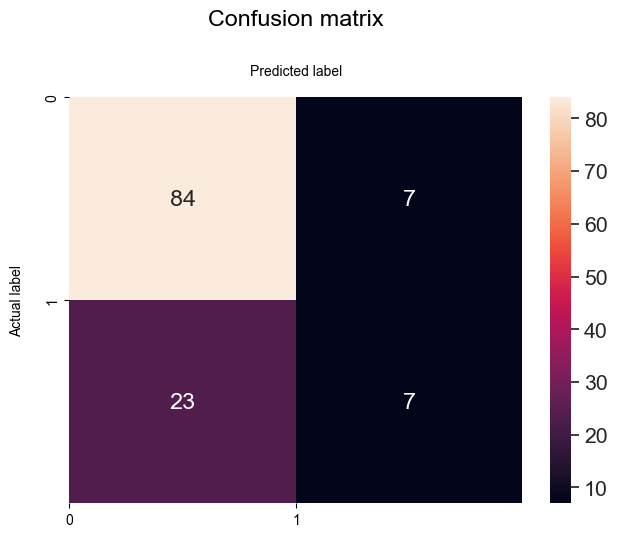

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create the Confusion matrix
cm = confusion_matrix(y_test, predictions) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [14]:
TP=7; FP=7; FN=23; TN=84

print(f'Accuracy : {round((TP+TN)/(TP+FP+TN+FN),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP)/(TP+FP), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+TP), 3)}')            # TN / (TN + FP)

Accuracy : 0.752
Precision : 0.5
Recall/Sensitivity : 0.233
Specificity : 0.923


Axes(0.125,0.11;0.775x0.77)


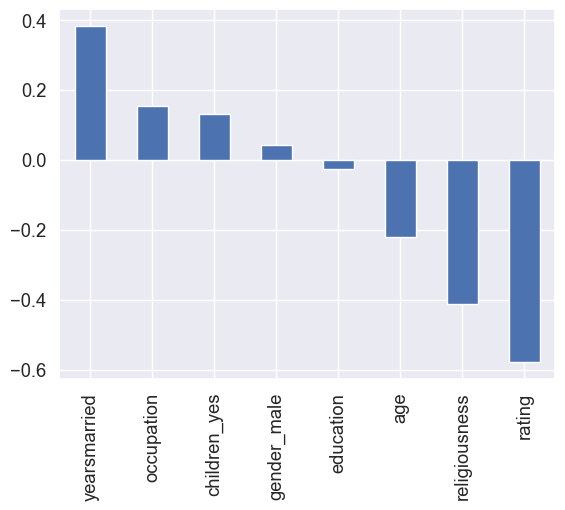

In [16]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:15].plot(kind='bar'))

In [ ]:
#Suppert Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.7355371900826446

Text(0.5, 16.049999999999997, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

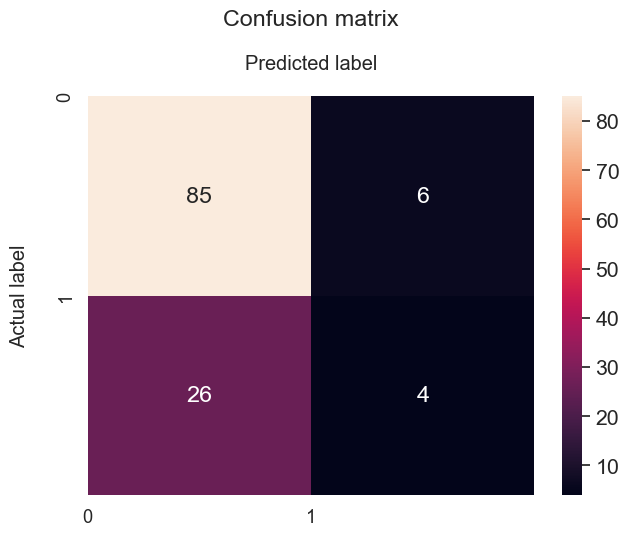

In [21]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [22]:
TP=4; FP=6; FN=26; TN=85

print(f'Accuracy : {round((TP+TN)/(TP+FP+TN+FN),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP)/(TP+FP), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+TP), 3)}')            # TN / (TN + FP)

Accuracy : 0.736
Precision : 0.4
Recall/Sensitivity : 0.133
Specificity : 0.955


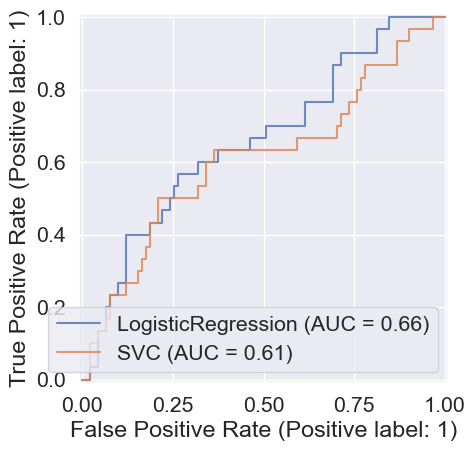

In [24]:
from sklearn.metrics import RocCurveDisplay


ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

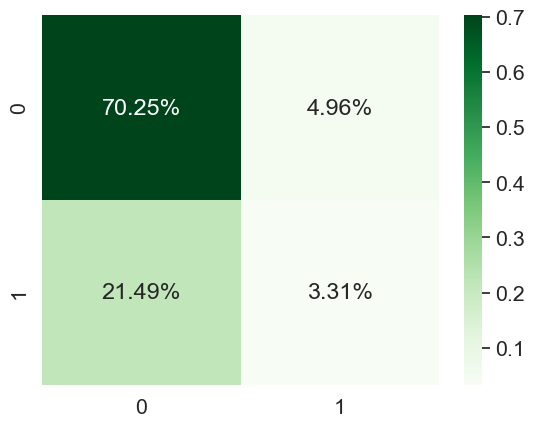

In [25]:
# 顯示百分比的混淆矩陣
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens')
plt.show()